In [1]:
import numpy as np
import pandas as pd

In [5]:
movie=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\movies.csv")

In [6]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [9]:
movie.shape

(9742, 3)

In [10]:
ratings=pd.read_csv(r"C:\Users\hp\Downloads\movie_data\ratings.csv")

In [11]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
ratings.shape

(100836, 4)

In [15]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [17]:
# merging two data sets
movies=movie.merge(ratings,on='movieId')
movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [54]:
max_rated_movie=movies.groupby('title')['rating'].count().idxmax()
max_rated_movie

'Forrest Gump (1994)'

In [94]:
tages=pd.read_csv(r'C:\\Users\\hp\\Downloads\\movie_data\\tags.csv')
tages.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [97]:
ttages=tages.merge(movie,on='movieId')
ttages.head(2)

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy


In [50]:
turminator_rating=movies.loc[movies['title']=='Terminator 2: Judgment Day (1991)','rating']
avg_rating=turminator_rating.mean()

In [51]:
avg_rating

3.970982142857143

In [46]:
import matplotlib.pyplot as plt

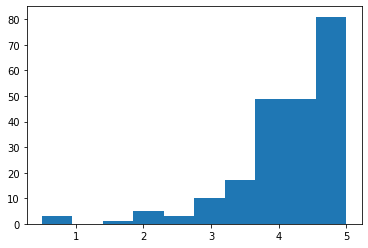

In [48]:
rating=movies[movies['title']=='Fight Club (1999)']['rating']
plt.hist(rating,bins=10)
plt.show()

In [56]:
# Mandetory Operations
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [58]:
grouped_ratings=ratings.groupby(by='movieId')['rating'].agg([pd.np.mean,pd.Series.count])
grouped_ratings

C:\Users\hp\AppData\Local\Temp\ipykernel_6852\555552639.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  grouped_ratings=ratings.groupby(by='movieId')['rating'].agg([pd.np.mean,pd.Series.count])


,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [60]:
merged_dataset=movies.merge(grouped_ratings,on='movieId')
merged_dataset

,movieId,title,genres,userId,rating,timestamp,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,3.92093,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.92093,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,3.92093,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,3.92093,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,3.92093,215
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,4.00000,1
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,3.50000,1
100833,193585,Flint (2017),Drama,184,3.5,1537109805,3.50000,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,3.50000,1


In [78]:
filterded_data=merged_dataset[merged_dataset['count']>50]
filterded_data

,movieId,title,genres,userId,rating,timestamp,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,3.920930,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.920930,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,3.920930,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,3.920930,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,3.920930,215
...,...,...,...,...,...,...,...,...
98310,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,3.833333,54
98311,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,3.833333,54
98312,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,3.833333,54
98313,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,3.833333,54


In [80]:
populer_movie=filterded_data.groupby(by=['title'])['rating'].mean()
populer_movie.idxmax()

'Shawshank Redemption, The (1994)'

In [84]:
populer_movie=filterded_data.groupby(by=['title'])['rating'].count().sort_values(ascending=False).head(5)
populer_movie

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [85]:
link=pd.read_csv(r'C:\Users\hp\Downloads\movie_data\links.csv')

In [86]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [103]:
df=filterded_data.merge(link,on='movieId')
df.head(2)

,movieId,title,genres,userId,rating,timestamp,mean,count,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,3.92093,215,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.92093,215,114709,862.0


In [106]:
df.loc[df['imdbId'].idxmax()]['movieId']

109374